# Interpolation of data
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\$ f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\$

Here, \$ f^{(n)} \$ is the nth derivative and \$ x_0 \$ is the argument around which we expand the function

### 1.1 Example: Exponential function

\$ f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \$

In [2]:
def expTaylor(x, x0, nmax):
    s = 0
    for n in range(0,nmax+1):
        s = s + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return s


C:\Users\Nanda Kishor Girish\AppData\Local\Temp\ipykernel_72120\659262921.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  s = s + np.exp(x0) * (x-x0)**n / np.math.factorial(n)


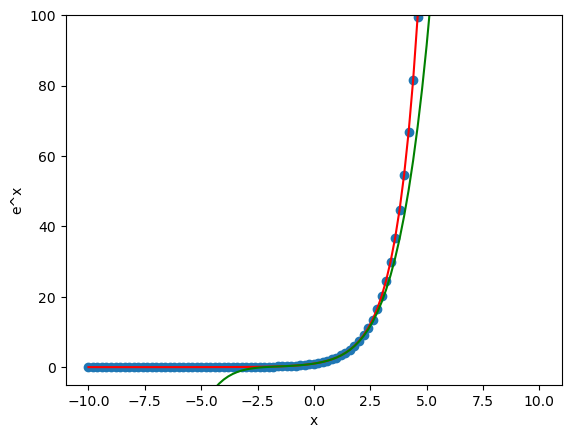

In [3]:
plt.xlabel("x")
plt.ylabel("e^x")
plt.ylim([-5,100])
x1 = np.linspace(-10,10,101)
y1 = np.exp(x1)
y2 = expTaylor(x1,0,100)
y3 = expTaylor(x1,0,5)
plt.scatter(x1,y1)
plt.plot(x1,y2, "red")
plt.plot(x1,y3, "green")

### 1.2 Example: sin function at \$x_0 = 0\$

\$ f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \$

\$ f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \$

\$ f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \$

\$ \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\$

In [4]:
def sinTaylor(x, nmax):
    s = 0
    for n in range(0,nmax):
        s = s + (-1)**n * x**(2*n +1) / np.math.factorial(2*n+1)
    return s

C:\Users\Nanda Kishor Girish\AppData\Local\Temp\ipykernel_72120\3261094161.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  s = s + (-1)**n * x**(2*n +1) / np.math.factorial(2*n+1)


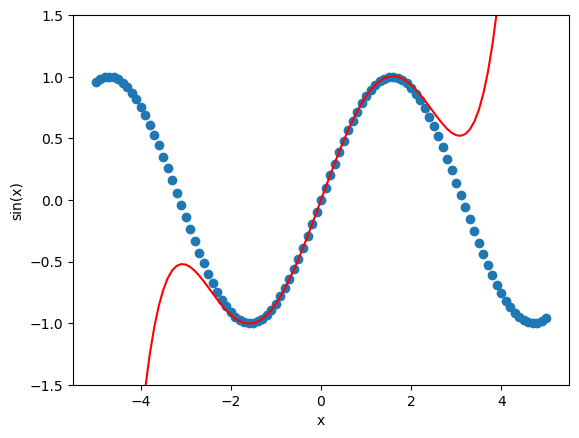

In [5]:
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.ylim([-1.5,1.5])
x1 = np.linspace(-5,5,101)
y1 = np.sin(x1)
y2 = sinTaylor(x1,3)
plt.scatter(x1,y1)
plt.plot(x1,y2, "red")

- Accuracy of \$ \sin(10.5) \$

### 1.3 Implementation of a general function

Derivative (more details in separate section): \$ f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \$

In [6]:
def derivative(f,x):
    h = 0.01
    return (f(x+h) - f(x)) / h

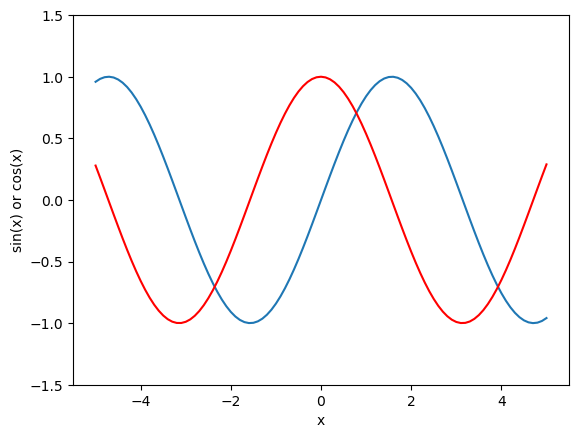

In [7]:
plt.xlabel("x")
plt.ylabel("sin(x) or cos(x)")
plt.ylim([-1.5,1.5])
x1 = np.linspace(-5,5,101)
y1 = np.sin(x1)
y2 = derivative(np.sin,x1)
plt.plot(x1,y1)
plt.plot(x1,y2, "red")

Higher derivatives: \$ f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\$

In [8]:
def nDerivative(f,x,n):
    h = 0.01
    s = 0
    for k in range(n+1):
        s = s + ((-1)**(k + n) * np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h))
    return s/(h**n)
    

C:\Users\Nanda Kishor Girish\AppData\Local\Temp\ipykernel_72120\1989905925.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  s = s + ((-1)**(k + n) * np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h))


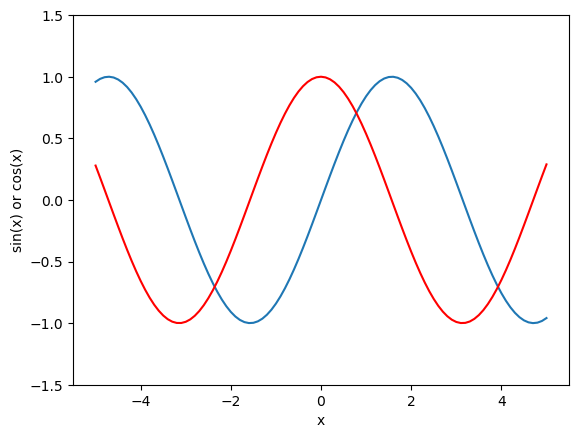

In [9]:
plt.xlabel("x")
plt.ylabel("sin(x) or cos(x)")
plt.ylim([-1.5,1.5])
x1 = np.linspace(-5,5,101)
y1 = np.sin(x1)
y2 = nDerivative(np.sin,x1,1)
plt.plot(x1,y1)
plt.plot(x1,y2, "red")

In [10]:
def genTaylor(f,x,x0,nmax):
    s = 0
    for n in range(0,nmax+1):
        s = s +  (nDerivative(f,x0,n) * (x-x0)**n)/np.math.factorial(n)
    return s

C:\Users\Nanda Kishor Girish\AppData\Local\Temp\ipykernel_72120\1989905925.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  s = s + ((-1)**(k + n) * np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h))
C:\Users\Nanda Kishor Girish\AppData\Local\Temp\ipykernel_72120\520581549.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  s = s +  (nDerivative(f,x0,n) * (x-x0)**n)/np.math.factorial(n)


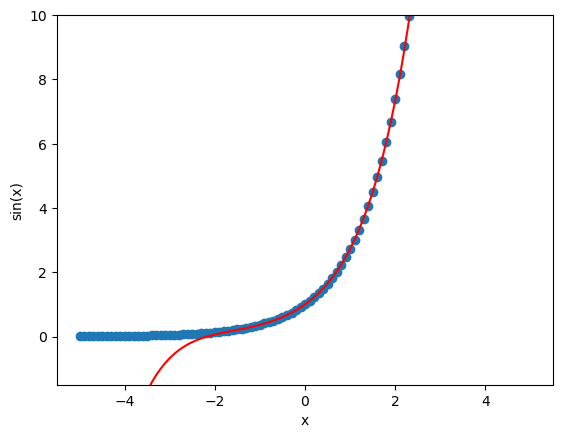

In [11]:
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.ylim([-1.5,10])
x1 = np.linspace(-5,5,101)
y1 = np.exp(x1)
y2 = genTaylor(np.exp,x1,0,5)
plt.scatter(x1,y1)
plt.plot(x1,y2, "red")

## 2. Interpolation

### 2.1 Generate data points

In [12]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [13]:
npoints = 21
x_list = np.linspace(-10,10,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

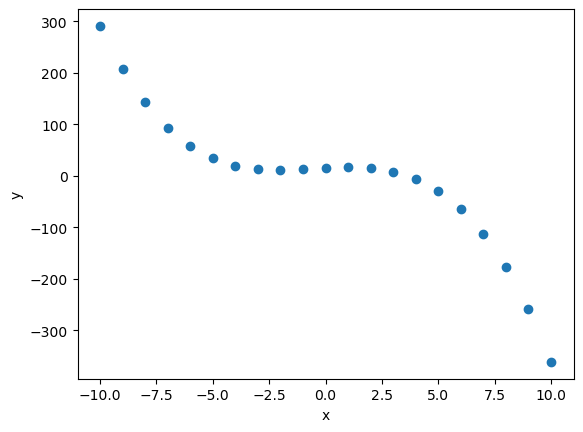

In [14]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

In [15]:
0.1 * (2*np.random.rand(npoints)-1)

array([-0.07923264,  0.07980677,  0.00213804,  0.07921444, -0.02996007,
       -0.02567469, -0.06363664, -0.07660554,  0.02187924, -0.00148045,
        0.06548601,  0.0428328 , -0.09571653,  0.05684671, -0.06979186,
       -0.02099637,  0.09090994, -0.07140292, -0.00913994,  0.09317524,
        0.05830771])

In [16]:
data = np.array([data0[0] + 0.5 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])

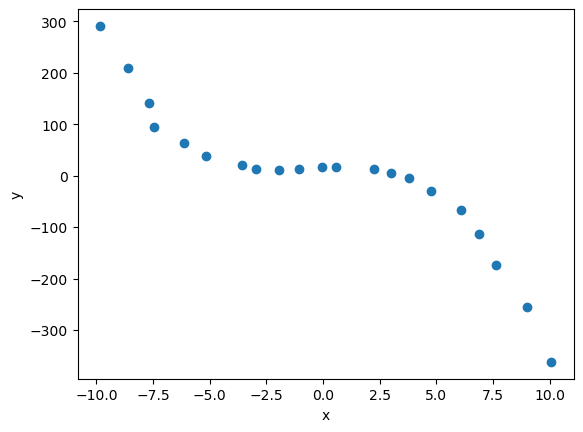

In [17]:
plt.xlabel('x')
plt.ylabel('y')

# plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

In [18]:
from scipy import interpolate

- linear splines

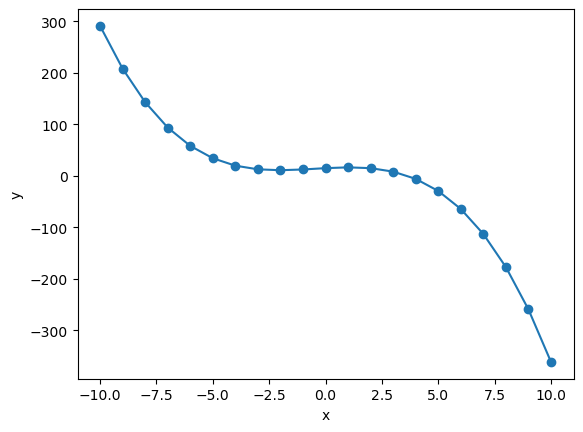

In [19]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

- zoom

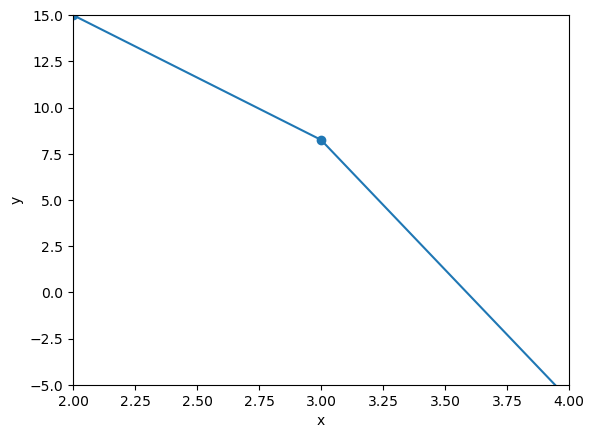

In [20]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

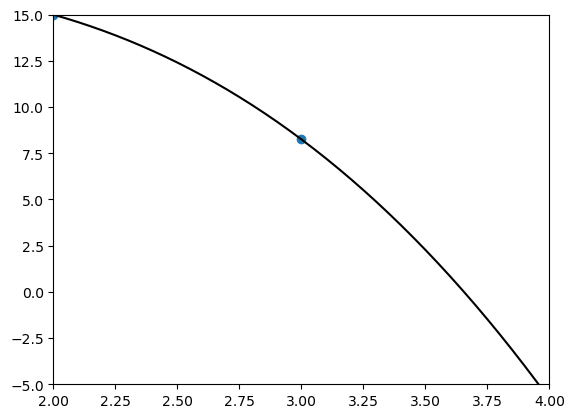

In [21]:
splineCubic0 = interpolate.interp1d(data0[0],data0[1], kind = 'cubic')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0],data0[1])
plt.plot(x_list,splineCubic0(x_list), "black")

### 2.2.2 Perturbed data

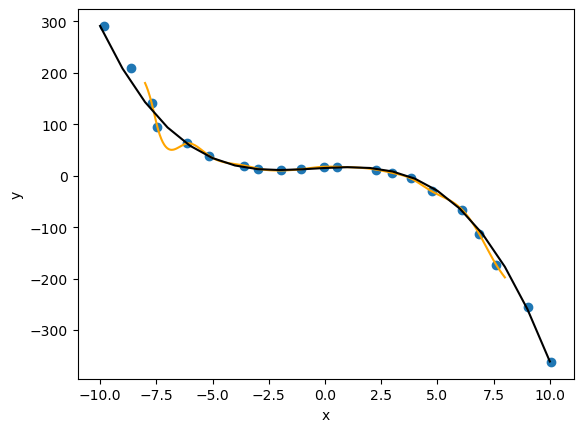

In [22]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])
x1 = np.linspace(-8,8,1000)
plt.plot(x1, splineCubic(x1), "orange")
plt.plot(data0[0],data0[1], "black")

- How to handle data which is not smooth?

In [23]:
smoothSpline = interpolate.UnivariateSpline(data[0],data[1])
smoothSpline.set_smoothing_factor(5000)

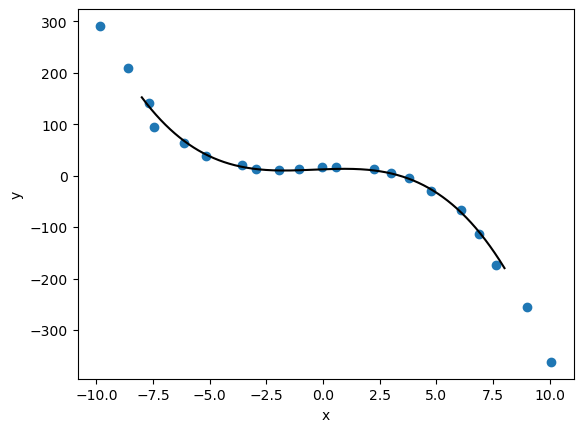

In [24]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])
plt.plot(x1, smoothSpline(x1), 'black')

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \$ f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\$

In [25]:
def polynomialModel(x,a):
    s = 0
    for k in range(len(a)):
        s = s + a[k] * x**k
    return s

In [26]:
a_init = np.array([2,2.4,-0.5,-0.35])
x1 = np.linspace(-10,10,1000)
y1 = polynomialModel(x1,a_init)

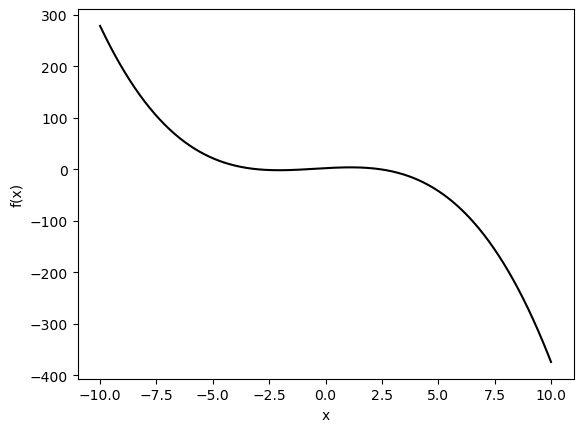

In [27]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x1,y1, "black")

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \$ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\$

\$ f \$ is the fit function that is determined by the coefficients \$ a_i \$ in our case.

\$ (x_i, y_i) \$ are the data points that we try to fit.

In [28]:
def errorFunction(f, coefficients, data):
    s = 0
    for i in range(len(data[0])):
            s = s + (data[1,i] - f(data[0,i],coefficients))**2
    return s


In [29]:
errorFunction(polynomialModel, a_init, data0)

3549.0

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \$ a_i \$ will be updated along the gradient direction of the error function \$ \nabla_{\vec{a}} \Delta\$. The gradient consists of elements \$ \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\$

In [30]:
def errorFitGradient(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    return -2 * np.array([
            np.sum(np.array([0.001*((data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k) for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [31]:
errorFitGradient(polynomialModel, a_init, data)

array([ -0.57159234,   1.11350973, -24.38216062,  69.18601895])

### 2.3.4 Loop for the actual fitting

In [32]:
iterations = 1000000
a = 3*np.random.rand(4) - 1

In [33]:
print(a)
for i in range(iterations):
    a = a - 0.0001*errorFitGradient(polynomialModel, a, data)
print(a)
print(a_init)

[-0.78067432  1.5947926   1.75724869 -0.07184431]
[10.23808051  1.71943613 -0.37576373 -0.35089714]
[ 2.    2.4  -0.5  -0.35]


- Comparison of a and a0